# Daily Chart 01: Firefighters in California
Source: American Community Survey, 2003-2016.<br>
Notes: Adults (18+) in California (FIPS = 06), occupational code (OCC) 3740: Firefighters. List and dates of largest fires in California from [Wikipedia](https://en.wikipedia.org/wiki/List_of_California_wildfires)

***
**Set up**

In [1]:
import pandas as pd
import altair as alt

# Theme:
%run "../../00 - Set Up/scripts/cimarron_theme.py"

In [2]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ubuntu|Ubuntu+Condensed|Ubuntu+Mono');
</style>

In [3]:
df = pd.read_csv('../data/processed/Firefighters in CA.csv', parse_dates=['Year'])

df.head()

,Year,Native,Foreign-Born
0,2003-01-01,32985,1843
1,2004-01-01,39399,2789
2,2005-01-01,34608,1536
3,2006-01-01,33815,1876
4,2007-01-01,38985,2839


In [4]:
dff = df.melt(id_vars='Year').copy()
dff.columns = ['year', 'native status', 'number of people',]

In [5]:
fires = alt.pd.read_csv('../data/processed/fires.csv', encoding = 'utf-8', parse_dates=['end','start'])
fires.head()

,end,event,start,acres
0,2003-12-05,Cedar,2003-10-25,273246
1,2006-10-13,Day,2006-09-04,162702
2,2007-10-29,Zaca,2007-07-04,240207
3,2007-11-13,Witch,2007-10-21,197990
4,2008-09-30,Klamath Theater Complex,2008-06-21,192038


In [6]:
base_df = dff.groupby('year')["number of people"].sum().reset_index()
alt_df = dff[dff['native status'] == 'Foreign-Born']

In [7]:
base = alt.Chart(base_df).mark_line().encode(
    x = alt.X("year:T", title = " ", axis = alt.Axis(tickCount = 13, grid = False,),),
    y = alt.Y("number of people:Q", title = "number of firefighters",),
).properties(
    title = "01: Fighting Fire in California",
    width = 1200,
    height = 600,
)

band = alt.Chart(fires).mark_rect().encode(
    x='start:T',
    x2='end:T',
    color = alt.Color("acres:Q", legend = alt.Legend(title = "total acres burned", zindex = 0, padding = 0, offset=-120))
).properties(
    width = 1080,
    height = 800,
    
)

main_chart = base + band

In [8]:
source = "SOURCE: American Community Survey, 2003-2016."
source2 = "List and dates of largest fires in California from Wikipedia."
notes = "NOTES: Adults (18+) in California, OCCupational code 3740: Firefighters. "

        
source_chart = alt.Chart(fires).mark_text(text = source, dx = 800, size = 18).properties(
    height = 20,
    width = 1080,
)
# source2_chart = alt.Chart(fires).mark_text(text = source2, dx = 800, size = 18).properties(
#     height = 20,
#     width = 1080,
# )
notes_chart = alt.Chart(fires).mark_text(text = notes + source2, dx = 800, size = 18).properties(
    height = 20,
    width = 1080,
)

# caption = source_chart & source2_chart & notes_chart

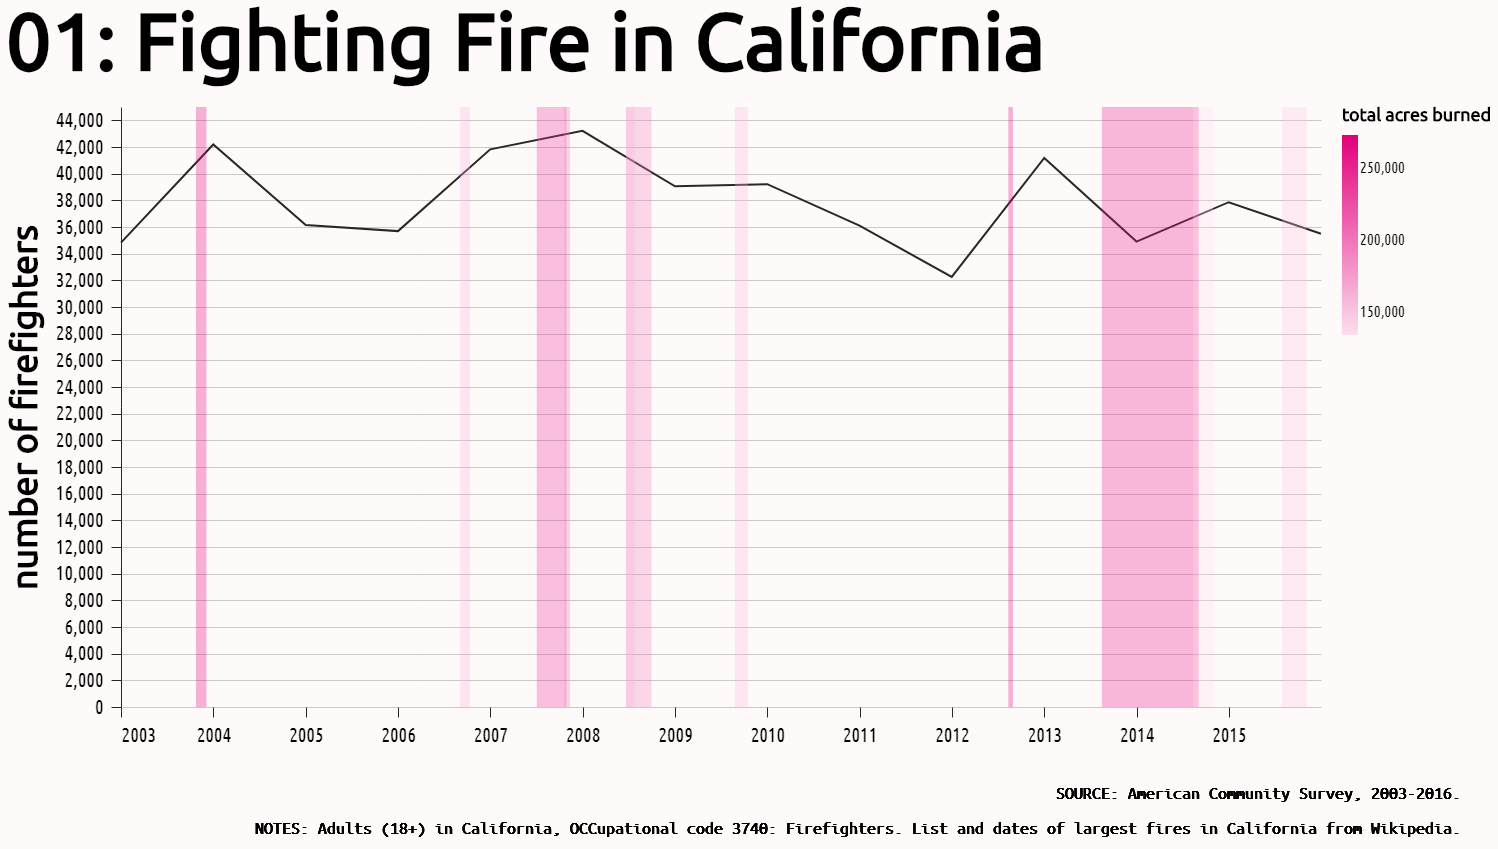

In [9]:
daily_chart1 = main_chart & source_chart & notes_chart

daily_chart1